# keras
安装keras
安装pydot

keras是更高层的深度学习框架，可以运行在其它的底层框架上，包括TensorFlow和CNTK。
本篇文档的keras是运行在tensorflow上面的，也就是说keras内部会调用tensorflow来完成任务
keras比tensorflow更方便，就好比.net里面鼠标拖动生成一个窗体一样简单

为什么使用keras
keras诞生是为了让人工只能程序员更快速的构建AI程序，就像tensorflow是比python更高层的框架一样，keras是比tensorflow更高层的框架，人工智能的研发需要不停的尝试各种模型，以便找到更精准的模型，所以尝试的速度尤为重要，keras可以更加快速的构建AI程序 

然而，更高层次的框架就以为着更少的灵活性，有些复杂的AI程序只能使用tensorflow甚至是只能用python，无法使用keras进行开发，有利有弊

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [9]:
# 取出训练数据，并且进行标准化处理。
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## 用keras构建模型

keras非常善于快速构建模型，使用它，可以在很短时间内构建出一个表现优秀的模型,keras编程中喜欢复用变量，这与numpy和tensorflow中不同，之前会定义X，Z1, A1, Z2, A2等等，而keras中，X作为每一层的输入，然后这一层的输出又会存储到X中

keras要训练和测试一个模型，需要下面4个步骤：
1.调用下面的函数来创建一个模型示例
2.编译模型实例
model.compile(optimizer ='...', loss ='...', metrics =['accuracy'])
3.训练模型
调用model.fit(x = ..., y =..., epochs =..., batch_size = ...)
4.测试模型
model.evaluate(x = ..., y =...)

In [4]:
def model(input_shape):
    #定义一个占位符X_input,稍后人脸图片数据会输入到这个占位符中，
    #input_shape中包含来占位符维度信息
    X_input = Input(input_shape)
    
    #给占位符矩阵padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    #构建一个卷积层，并对结果进行BatchMormalization操作
    #然后送入激活函数
    X = Conv2D(32,(7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    #构建MAXPOOL层
    X = MaxPooling2D((2, 2), name = 'max_pool')(X)
    
    #将矩阵扁平化成向量，然后构建一个全链接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    #构建一个keras模型示例，后面会通过这个示例句柄来进行模型的训练和预测
    model = Model(inputs = X_input, outputs = X, name ='HappyModel')

    return model

In [10]:
def HappyModel(input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), name='max_pool')(X)


    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    model = Model(inputs=X_input, outputs=X, name='HappyModel')
    
    return model

In [11]:
# 1.创建模型示例
happyModel = HappyModel(X_train.shape[1:])

In [12]:
# 2.编译模型
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# 3.训练模型
happyModel.fit(X_train, Y_train,epochs=40, batch_size=50)

Epoch 1/40


In [ ]:
# 4.测试模型
pred = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose = 1,sample_weight=None)

print()
print('Loss =' + str(pred[0]))
print('Test Accuracy = ' + str(pred[1]))

# 用自己的图片测试一下

In [5]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

NameError: name 'happyModel' is not defined

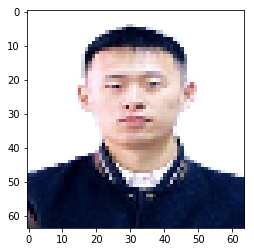

In [6]:
### 把这个图片换成自己的
img_path = 'images/cr.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))